# Compare the weekly statistics (Mean, Median, Mode) for number of Cases and Deaths across United States

### Import pandas, numpy, plotly, Image and math

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from IPython.display import Image
import math

### Read the Cases Dataset 

In [2]:
cases = pd.read_csv('covid_confirmed_usafacts.csv')
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


### Read the Deaths Dataset 

In [3]:
deaths = pd.read_csv("covid_deaths_usafacts.csv")
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


### We will narrow down to the timeframe between July and December of 2020 for the Cases Dataset.

In [4]:
# Generate a list of columns that fall within the second half of the year 2020
date_columns_of_interest = [date for date in cases.columns if '2020-07-01' <= date <= '2020-12-31']

# Define a list of key columns that will be used alongside the date columns
essential_columns = ["countyFIPS", "County Name", "State", "StateFIPS"]

# Combine the essential details with the date-specific data
columns_to_use = essential_columns + date_columns_of_interest

# Filter the dataset to only include our columns of interest
filtered_cases = cases[columns_to_use]

# Display the initial few entries of the dataset for a quick preview
filtered_cases.head()


,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,553,561,568,591,615,618,...,3841,3889,3942,3990,3999,4029,4065,4105,4164,4190
2,1003,Baldwin County,AL,1,703,751,845,863,881,911,...,12155,12321,12521,12666,12708,12825,12962,13172,13392,13601
3,1005,Barbour County,AL,1,326,335,348,350,352,356,...,1363,1383,1390,1396,1398,1406,1417,1462,1492,1514
4,1007,Bibb County,AL,1,174,179,189,190,193,197,...,1660,1683,1711,1725,1739,1746,1762,1792,1817,1834


### Compile Weekly Case Totals in Untied States and Chart the Trends


In [5]:
# July 1, 2020 is a Wednesday
count = 2
weekly_cases_us = []  # where Wednesday from each week is chosen

for col in filtered_cases.columns:
    if col not in essential_columns:
        count = count + 1
        if count % 7 == 0:  # Check if the column corresponds to a Wednesday
            weekly_cases_us.append(filtered_cases[col].sum())

# Convert the list to a pandas Series 
weekly_cases_us_data = pd.Series(weekly_cases_us)


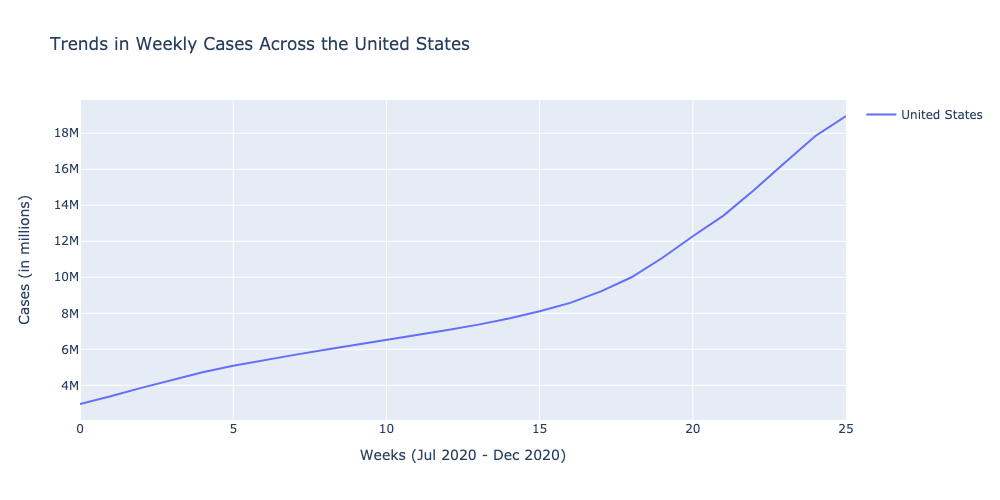

In [6]:
# Create a Plotly figure with custom dimensions and layout

def plot_data(x_values, y_values, title, xaxis_label, yaxis_label, image_name):
   
    # Initialize a figure object
    fig = go.Figure()

    # Add a scatter trace to the figure
    fig.add_trace(
        go.Scatter(
            x=x_values, 
            y=y_values,
            mode='lines', 
            name='United States'
        )
    )

    # Update the layout of the figure
    fig.update_layout(
        title=title,
        xaxis_title=xaxis_label,
        yaxis_title=yaxis_label,
        showlegend=True,
        width=1000,  
        height=500   
    )

    fig.write_image(image_name)

# Use the function to plot weekly cases across the United States
plot_data(
    weekly_cases_us_data.index, 
    weekly_cases_us_data,
    'Trends in Weekly Cases Across the United States',
    'Weeks (Jul 2020 - Dec 2020)',
    'Cases (in millions)',
    'us_cases_refactored.png'
)

# Display the saved image
display(Image(filename='us_cases_refactored.png'))


###  The Mean, Mode and Medium for the number of Cases across United States

In [7]:
average_cases = round(weekly_cases_us_data.mean(), 2)
mode_cases = weekly_cases_us_data.mode().iloc[0]
median_cases = int(weekly_cases_us_data.median())

print(f"Average of Cases across the United States from July to December 2020: {average_cases}")
print(f"Mode of Cases across United States from July to December 2020: {mode_cases}")
print(f"Median of Cases across United States from July to December 2020: {median_cases}")


Average of Cases across the United States from July to December 2020: 8605030.58
Mode of Cases across United States from July to December 2020: 2961395
Median of Cases across United States from July to December 2020: 7220652


### We will narrow down to the timeframe between July and December of 2020 for the Deaths dataset.


In [8]:
# Generate a list of columns that fall within the second half of the year 2020
date_columns_of_interest = [date for date in cases.columns if '2020-07-01' <= date <= '2020-12-31']

# Define a list of key columns that will be used alongside the date columns
essential_columns = ["countyFIPS", "County Name", "State", "StateFIPS"]

# Combine the essential details with the date-specific data
columns_to_use = essential_columns + date_columns_of_interest

# Filter the dataset to only include our columns of interest
filtered_deaths = deaths[columns_to_use]

# Display the initial few entries of the dataset for a quick preview
filtered_deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,12,13,13,13,13,13,...,44,46,46,46,46,47,47,47,48,48
2,1003,Baldwin County,AL,1,10,10,10,10,10,10,...,149,151,151,151,151,152,152,156,160,161
3,1005,Barbour County,AL,1,1,1,2,2,2,2,...,32,32,32,32,32,32,32,32,32,32
4,1007,Bibb County,AL,1,1,1,1,1,1,1,...,42,42,42,42,42,42,42,42,46,46


### Compile Weekly Death Totals in Untied States and Chart the Trends


In [9]:
# July 1, 2020 is a Wednesday
count = 2
weekly_deaths_us = []  # where Wednesday from each week is chosen

for col in filtered_deaths.columns:
     if col not in essential_columns:
        count = count + 1
        if count % 7 == 0:  # Check if the column corresponds to a Wednesday
            weekly_deaths_us.append(filtered_deaths[col].sum())

# Convert the list to a pandas Series 
weekly_deaths_us_data = pd.Series(weekly_deaths_us)


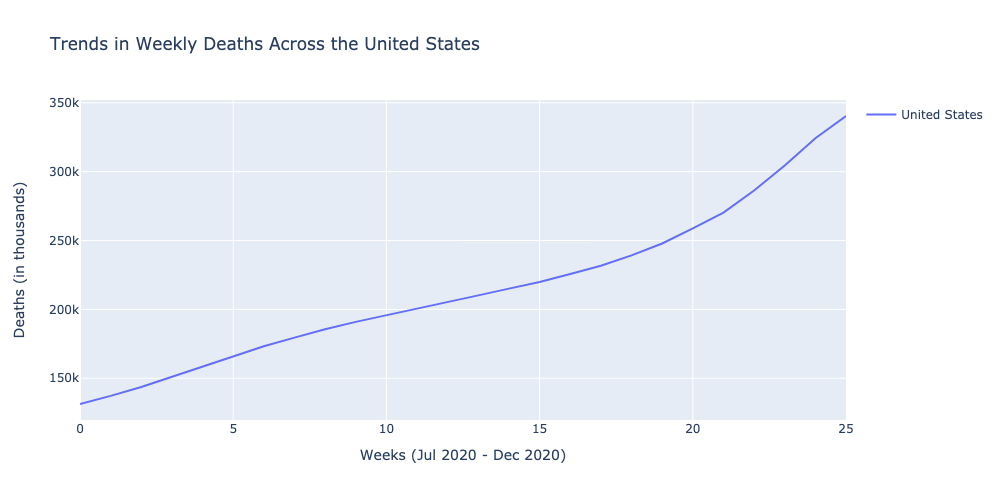

In [10]:
# Create a Plotly figure with custom dimensions and layout

def plot_data(x_values, y_values, title, xaxis_label, yaxis_label, image_name):
    
    # Initialize a figure object
    fig = go.Figure()

    # Add a scatter trace to the figure
    fig.add_trace(
        go.Scatter(
            x=x_values, 
            y=y_values,
            mode='lines', 
            name='United States'
        )
    )

    # Update the layout of the figure
    fig.update_layout(
        title=title,
        xaxis_title=xaxis_label,
        yaxis_title=yaxis_label,
        showlegend=True,
        width=1000,  
        height=500   
    )

    # Save the figure as an image file
    fig.write_image(image_name)

# Use the function to plot weekly deaths across the United States
plot_data(
    weekly_deaths_us_data.index, 
    weekly_deaths_us_data,
    'Trends in Weekly Deaths Across the United States',
    'Weeks (Jul 2020 - Dec 2020)',
    'Deaths (in thousands)',
    'us_deaths_refactored.png'
)

# Display the saved image
Image(filename='us_deaths_refactored.png')

### The Mean, Mode, and Median for the number of deaths across the United States

In [11]:
average_deaths = round(weekly_deaths_us_data.mean(), 2)
mode_deaths = weekly_deaths_us_data.mode().iloc[0]
median_deaths = int(weekly_deaths_us_data.median())

print(f"Average number of Deaths across the United States from July to December 2020: {average_deaths}")
print(f"Mode of Deaths across United States from July to December 2020: {mode_deaths}")
print(f"Median of Deaths across United States from July to December 2020: {median_deaths}")

Average number of Deaths across the United States from July to December 2020: 215118.12
Mode of Deaths across United States from July to December 2020: 131290
Median of Deaths across United States from July to December 2020: 207878


## Picking the five countries in the world to compare to the US.

In [12]:
# Load the dataset containing COVID-19 data
global_covid_data = pd.read_csv("owid-covid-data.csv", low_memory=False)

# Define a list of countries for focused analysis
target_countries = ["India", "China", "France", "Canada", "Russia"]

# Select relevant columns and filter the dataset for the target countries
refined_covid_data = global_covid_data[
    ["continent", "location", "date", "new_cases", "total_cases", "new_deaths", "total_deaths", "population"]
].query("location in @target_countries")

# Ensure the 'date' column is in datetime format to enable date range filtering
refined_covid_data['date'] = pd.to_datetime(refined_covid_data['date'])

# Filter the dataset for the specified date range
date_range_start = pd.Timestamp('2020-07-01')
date_range_end = pd.Timestamp('2020-12-31')
refined_covid_data = refined_covid_data[
    (refined_covid_data['date'] >= date_range_start) & (refined_covid_data['date'] <= date_range_end)
]

refined_covid_data.reset_index(drop=True, inplace=True)
refined_covid_data

,continent,location,date,new_cases,total_cases,new_deaths,total_deaths,population
0,North America,Canada,2020-07-01,0.0,102783.0,0.0,8475.0,38454328.0
1,North America,Canada,2020-07-02,0.0,102783.0,0.0,8475.0,38454328.0
2,North America,Canada,2020-07-03,0.0,102783.0,0.0,8475.0,38454328.0
3,North America,Canada,2020-07-04,0.0,102783.0,0.0,8475.0,38454328.0
4,North America,Canada,2020-07-05,2296.0,105079.0,152.0,8627.0,38454328.0
...,...,...,...,...,...,...,...,...
915,Europe,Russia,2020-12-27,201871.0,3050248.0,3920.0,54778.0,144713312.0
916,Europe,Russia,2020-12-28,0.0,3050248.0,0.0,54778.0,144713312.0
917,Europe,Russia,2020-12-29,0.0,3050248.0,0.0,54778.0,144713312.0
918,Europe,Russia,2020-12-30,0.0,3050248.0,0.0,54778.0,144713312.0


## Let’s Look at the Differences:

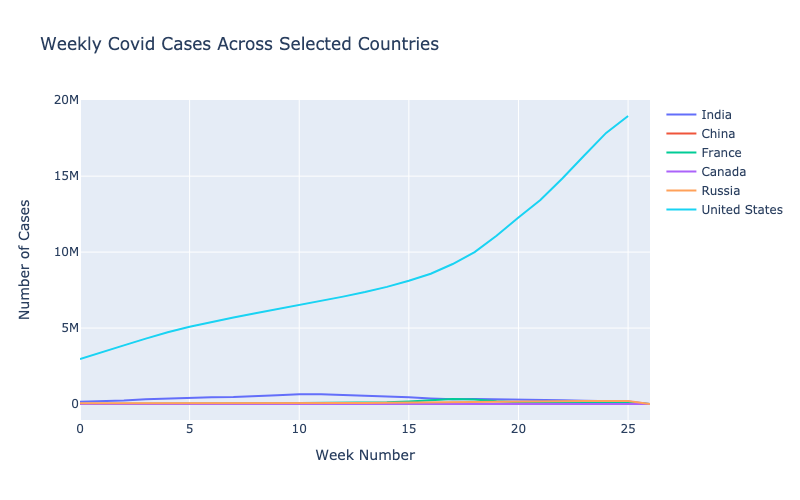

In [13]:
# Simplified extraction of unique weeks
unique_weeks = refined_covid_data['date'].dt.to_period('W').unique()

# Initialize dictionaries to hold weekly case and death data
weekly_data_cases = {country: [] for country in target_countries}
weekly_data_deaths = {country: [] for country in target_countries}

# Loop over each country and each week to sum cases and deaths
for country in target_countries:
    country_data = refined_covid_data[refined_covid_data['location'] == country]
    for week in unique_weeks:
        weekly_data = country_data[country_data['date'].dt.to_period('W') == week]
        weekly_data_cases[country].append(weekly_data['new_cases'].sum())
        weekly_data_deaths[country].append(weekly_data['new_deaths'].sum())

# Convert the weekly data to pandas Series and then to a DataFrame
df_weekly_cases = pd.DataFrame(weekly_data_cases)
# Assuming weekly_cases_us_data is defined elsewhere and contains the US data
df_weekly_cases['United States'] = weekly_cases_us_data[:len(df_weekly_cases)]

# Plotting the weekly case data
fig_cases = go.Figure()

# Add traces for each country
for country in df_weekly_cases.columns:
    fig_cases.add_trace(go.Scatter(x=df_weekly_cases.index, y=df_weekly_cases[country], mode='lines', name=country))

# Update layout for the figure
fig_cases.update_layout(
    title='Weekly Covid Cases Across Selected Countries',
    xaxis_title='Week Number',
    yaxis_title='Number of Cases',
    showlegend=True,
    width=800,
    height=500
)

# Save the figure as a PNG image
img_filename_cases = "countries_comparison_cases.png"
fig_cases.write_image(img_filename_cases)

# Display the image
display(Image(filename=img_filename_cases))


In [14]:
def create_death_trend_figure(data, title, x_label, y_label, file_name):
    # Initialize the figure object
    fig = go.Figure()

    # Add traces for each country
    for country, deaths in data.items():
        fig.add_trace(go.Scatter(
            x=data.index, 
            y=deaths, 
            mode='lines+markers',  # Added markers for better visibility
            name=country
        ))

    # Update layout to include titles and axis labels
    fig.update_layout(
        title=title,
        xaxis_title=x_label,
        yaxis_title=y_label,
        legend_title="Country",
        showlegend=True,
        width=1000,  # Adjusted for a wider figure
        height=600    # Adjusted for a taller figure
    )

    # Save the figure as an image file
    fig.write_image(file_name)
    return fig

# Create a DataFrame for deaths
country_deaths = pd.DataFrame({
    "United States": pd.Series(weekly_deaths_us_data),
    "India": pd.Series(weekly_data_deaths.get("India", [0] * len(weekly_deaths_us_data))),
    "China": pd.Series(weekly_data_deaths.get("China", [0] * len(weekly_deaths_us_data))),
    "France": pd.Series(weekly_data_deaths.get("France", [0] * len(weekly_deaths_us_data))),
    "Canada": pd.Series(weekly_data_deaths.get("Canada", [0] * len(weekly_deaths_us_data))),
    "Russia": pd.Series(weekly_data_deaths.get("Russia", [0] * len(weekly_deaths_us_data)))
})

# Call the function to create and display the figure
fig = create_death_trend_figure(
    country_deaths,
    'Weekly Covid Deaths Across Selected Countries',
    'Week Number (Starting July 2020)',
    'Number of Deaths (in thousands)',
    "five_countries_comparison_deaths.png"
)

# Display the figure
fig.show()

## Normalize the data by population.


In [15]:
def create_country_case_trend_figure(data, title, x_label, y_label, file_name):
    # Initialize the figure object
    fig = go.Figure()

    # Add traces for each country
    for country, cases in data.items():
        fig.add_trace(go.Scatter(
            x=data.index, 
            y=cases, 
            mode='lines+markers',  # Added markers for better visibility
            name=country
        ))

    # Update layout to include titles and axis labels
    fig.update_layout(
        title=title,
        xaxis_title=x_label,
        yaxis_title=y_label,
        legend_title="Country",
        showlegend=True,
        width=1000,  \
        height=600    
    )

    # Save the figure as an image file
    fig.write_image(file_name)
    return fig

# Create a DataFrame for cases
country_cases = pd.DataFrame({
    "United States": pd.Series(weekly_cases_us_data),
    "India": pd.Series(weekly_data_cases.get("India", [0] * len(weekly_cases_us_data))),
    "China": pd.Series(weekly_data_cases.get("China", [0] * len(weekly_cases_us_data))),
    "France": pd.Series(weekly_data_cases.get("France", [0] * len(weekly_cases_us_data))),
    "Canada": pd.Series(weekly_data_cases.get("Canada", [0] * len(weekly_cases_us_data))),
    "Russia": pd.Series(weekly_data_cases.get("Russia", [0] * len(weekly_cases_us_data)))
})

# Call the function to create and display the figure
fig = create_country_case_trend_figure(
    country_cases,
    'Weekly Covid Cases Across Selected Countries',
    'Week Number (Starting July 2020)',
    'Number of Cases',
    "five_countries_comparison_cases.png"
)

# Display the figure
fig.show()


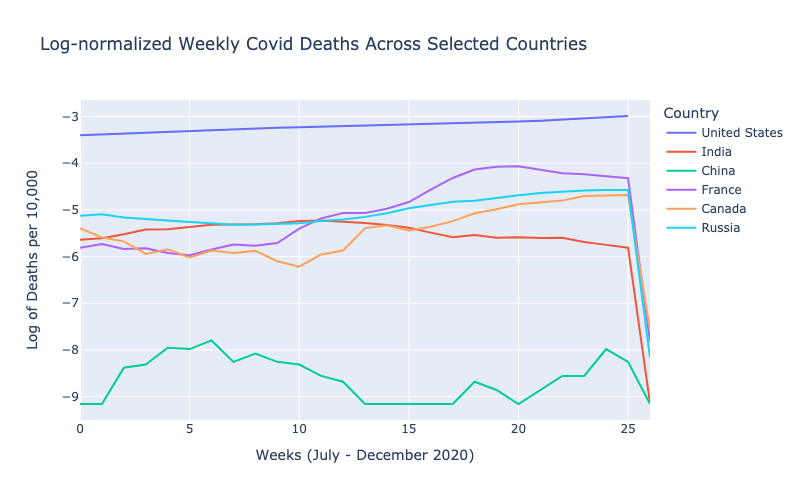

In [16]:
# Normalize death counts by population and apply log transformation

def normalize_log_transform(deaths, populations):
    normalized_log_transformed = pd.DataFrame()
    for country, population in populations.items():
        deaths[country]+=1
        normalized_log_transformed[country] = np.log10(deaths[country] / population)
    return normalized_log_transformed

# Creates and plot the normalized log-transformed death data
def plot_normalized_log_deaths(normalized_deaths, title, xaxis_label, yaxis_label, image_path):
    fig = go.Figure()
    for country, data in normalized_deaths.items():
        fig.add_trace(go.Scatter(x=data.index, y=data, mode='lines', name=country))

    fig.update_layout(
        title=title,
        xaxis=dict(title=xaxis_label),
        yaxis=dict(title=yaxis_label),
        legend_title="Country",
        width=800,
        height=500
    )
    
    fig.write_image(image_path)
    display(Image(image_path))

# Population data for the countries
populations = {
    "United States": 331002651,
    "India": 1380004385,
    "China": 1439323776,
    "France": 65273511,
    "Canada": 37742154,
    "Russia": 145934462
}

normalized_log_deaths = normalize_log_transform(country_deaths, populations)

# Plotting the normalized log-transformed data
plot_normalized_log_deaths(
    normalized_log_deaths,
    'Log-normalized Weekly Covid Deaths Across Selected Countries',
    'Weeks (July - December 2020)',
    'Log of Deaths per 10,000',
    'normalized_deaths_comparison.png'
)

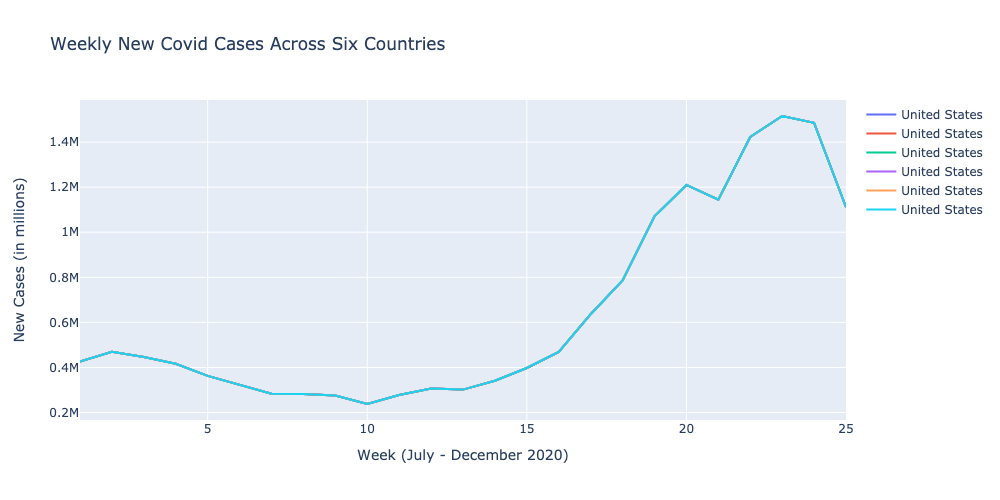

In [17]:
def plot_weekly_new_cases(dataframe, title, x_axis_title, y_axis_title, file_name):
   
    # Create a new Plotly figure
    fig = go.Figure()

    # Add a line trace for each country
    for country_cases in dataframe.columns:
        fig.add_trace(
            go.Scatter(
                x=dataframe.index, 
                y=dataframe[country], 
                mode='lines', 
                name=country
            )
        )

    
    fig.update_layout(
        title=title,
        xaxis_title=x_axis_title,
        yaxis_title=y_axis_title,
        showlegend=True,
        width=1000,
        height=500
    )

    # Save the figure as a PNG image
    fig.write_image(file_name)
    return Image(file_name)


# Calculates the difference to get the weekly new cases
diff_cases = country_cases.diff().dropna()

# Calculates the difference to get the weekly new deaths
diff_deaths = country_deaths.diff().dropna()

# Function with the necessary parameters for the chart.
image = plot_weekly_new_cases(
    diff_cases,
    'Weekly New Covid Cases Across Six Countries',
    'Week (July - December 2020)',
    'New Cases (in millions)',
    'weekly_new_cases_comparison.png'
)

# Display the image
display(image)

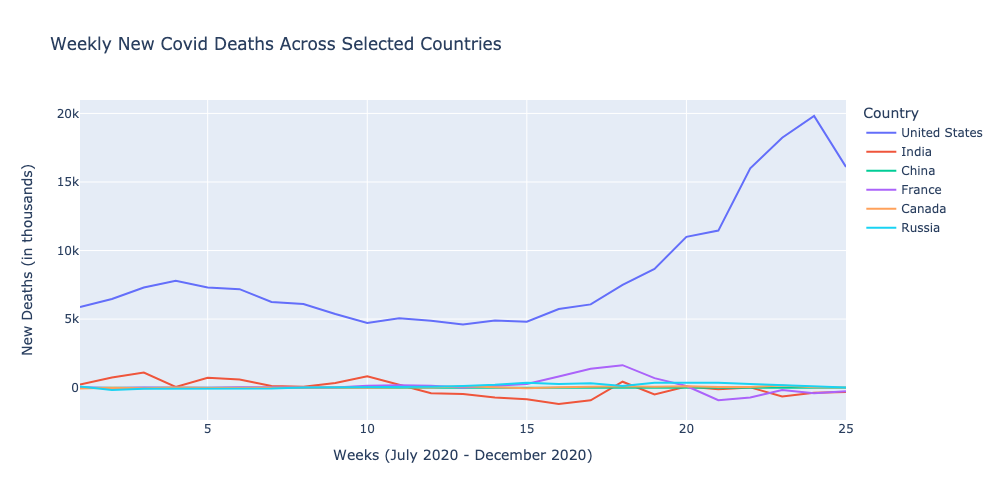

In [18]:
# Calculate the weekly difference in deaths and drop any missing values

weekly_death_differences = country_deaths.diff().dropna()

# Defines a function for creating and displaying a plotly figure
def plot_weekly_differences(data, title, xaxis_title, yaxis_title, output_filename):
    figure = go.Figure()

    # Iterate through each column in the DataFrame 
    for country in data.columns:
        figure.add_trace(go.Scatter(x=data.index, y=data[country], mode='lines', name=country))

    # Update layout of the figure
    figure.update_layout(
        title=title,
        xaxis=dict(title=xaxis_title),
        yaxis=dict(title=yaxis_title),
        legend_title="Country",
        width=1000,
        height=500
    )

    # Saves the figure to a file and displays it
    figure.write_image(output_filename)
    return Image(filename=output_filename)

# Function to plot the weekly differences in deaths
plot_weekly_differences(
    weekly_death_differences,
    'Weekly New Covid Deaths Across Selected Countries',
    'Weeks (July 2020 - December 2020)',
    'New Deaths (in thousands)',
    'weekly_new_deaths_comparison.png'
)

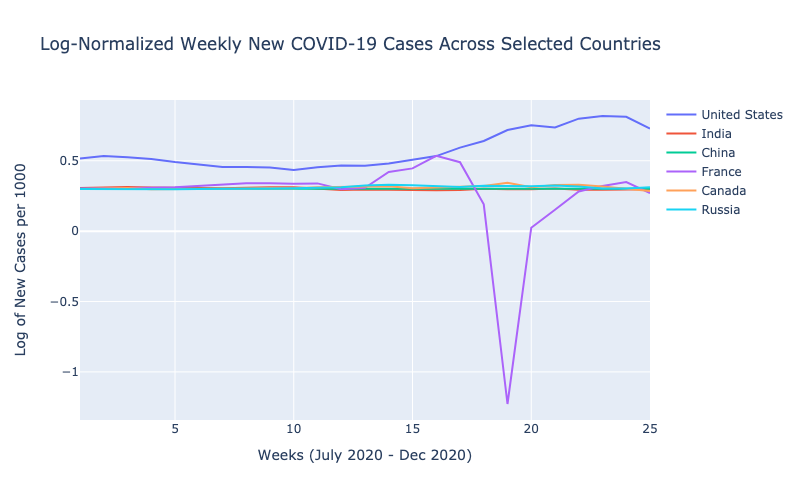

In [19]:
# Function to create a normalized data frame from differences in cases

def create_normalized_df(diff_df, population_divisors):
    normalized_df = pd.DataFrame()
    for country, divisor in population_divisors.items():
        diff_df[country]+=1
        #print (divisor)
        normalized_df[country] = (diff_df[country] / divisor+1)
    return normalized_df

# Function to plot the log normalized data
def plot_log_normalized_data(normalized_df, title, x_label, y_label, image_file):
    fig = go.Figure()
    for country in normalized_df.columns:
        fig.add_trace(
            go.Scatter(
                x=normalized_df.index, 
                y=np.log10(normalized_df[country] + 1),  # Added 1 to avoid log10(0)
                mode='lines', 
                name=country
            )
        )
    fig.update_layout(
        title=title,
        xaxis_title=x_label,
        yaxis_title=y_label,
        showlegend=True,
        width=800,
        height=500
    )
    fig.write_image(image_file)
    return Image(image_file)

# Population divisors adjusted for per 1000 population
population_divisors = {
    "United States": 331002,
    "India": 1380004,
    "China": 1439323,
    "France": 65273,
    "Canada": 37742,
    "Russia": 145934
}

# Creating the normalized data frame
diff_case_normalized = create_normalized_df(diff_cases, population_divisors)

# Plotting the log normalized data
plot_log_normalized_data(
    diff_case_normalized,
    'Log-Normalized Weekly New COVID-19 Cases Across Selected Countries',
    'Weeks (July 2020 - Dec 2020)',
    'Log of New Cases per 1000',
    'five_countries_comparison_diff_cases_norm.png'
)


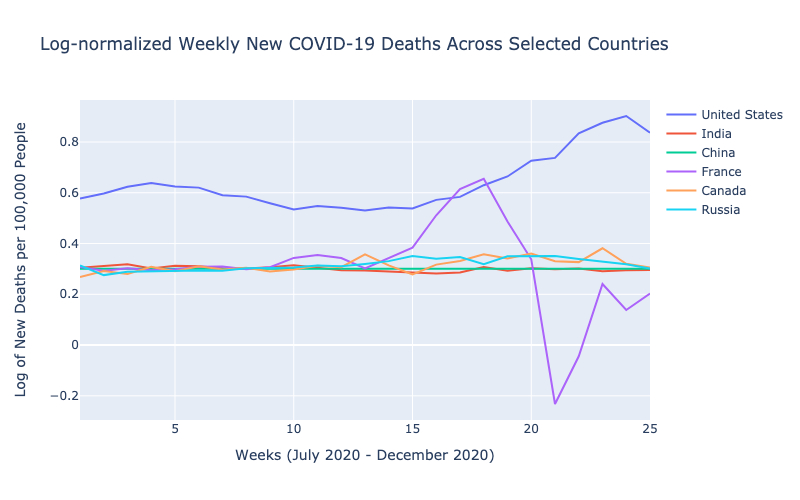

In [20]:
# Function to normalize and log-transform the difference in deaths

def normalize_log_transform_deaths(diff_deaths_df, normalization_factors):
    normalized_log_df = pd.DataFrame()
    for country, factor in normalization_factors.items():
        diff_deaths_df[country]+=1
        normalized_log_df[country] = np.log10((diff_deaths_df[country] / factor+1)+1)
    return normalized_log_df

# Function to plot the normalized and log-transformed data
def plot_normalized_log_deaths(data, title, x_label, y_label, file_path):
    fig = go.Figure()
    for country in data: # iterate directly over the DataFrame's columns
        fig.add_trace(go.Scatter(x=data.index, y=data[country], mode='lines', name=country))

    fig.update_layout(title=title, xaxis_title=x_label, yaxis_title=y_label, showlegend=True, width=800, height=500)
    
    # Save and display the figure
    fig.write_image(file_path)
    return Image(file_path)

# Normalization factors for each country, adjusted for per 100,000 population
normalization_factors = {
    "United States": 3310,
    "India": 13800,
    "China": 14393,
    "France": 652,
    "Canada": 377,  
    "Russia": 1459
}

# Apply normalization and log-transformation
normalized_log_diff_deaths = normalize_log_transform_deaths(diff_deaths, normalization_factors)

# normalized_log_diff_deaths is a DataFrame before passing to the plotting function
if not isinstance(normalized_log_diff_deaths, pd.DataFrame):
    raise ValueError('The data provided to plot_normalized_log_deaths must be a pandas DataFrame.')

# Plotting the normalized log-transformed differences in deaths
plot_normalized_log_deaths(
    normalized_log_diff_deaths,
    'Log-normalized Weekly New COVID-19 Deaths Across Selected Countries',
    'Weeks (July 2020 - December 2020)',
    'Log of New Deaths per 100,000 People',
    'normalized_new_deaths_comparison.png'
)


## Identifying the peak weeks of the Cases and Deaths in US and other Countries

In [21]:
def print_peak_values(country_name, case_data, death_data):
   
    # Find peak case values and corresponding weeks
    peak_cases_value = case_data.max()
    peak_cases_week = case_data.idxmax()
    
    # Find peak death values and corresponding weeks
    peak_deaths_value = death_data.max()
    peak_deaths_week = death_data.idxmax()
    
    # Print the results
    print(f"=== {country_name} ===")
    print(f"Peak Cases: {peak_cases_value} cases occurred within Week {peak_cases_week}.")
    print(f"Peak Deaths: {peak_deaths_value} deaths occurred within Week {peak_deaths_week}.\n")

# Countries for analysis
country_list = ['United States', 'India', 'China', 'France', 'Canada', 'Russia']

# Loop through the list of countries and apply the function
for country in country_list:
    print_peak_values(
        country,
        diff_cases[country], 
        diff_deaths[country]  
    )


=== United States ===
Peak Cases: 1515811.0 cases occurred within Week 23.
Peak Deaths: 19815.0 deaths occurred within Week 24.

=== India ===
Peak Cases: 79840.0 cases occurred within Week 3.
Peak Deaths: 1106.0 deaths occurred within Week 3.

=== China ===
Peak Cases: 562.0 cases occurred within Week 4.
Peak Deaths: 12.0 deaths occurred within Week 24.

=== France ===
Peak Cases: 93495.0 cases occurred within Week 16.
Peak Deaths: 1641.0 deaths occurred within Week 18.

=== Canada ===
Peak Cases: 7700.0 cases occurred within Week 19.
Peak Deaths: 153.0 deaths occurred within Week 23.

=== Russia ===
Peak Cases: 20155.0 cases occurred within Week 14.
Peak Deaths: 356.0 deaths occurred within Week 21.



The analysis of the COVID-19 trends reveals notable peaks in case and death counts for the evaluated countries. These peaks are critical indicators of the pandemic's intensity during specific periods. Let's delve into the potential factors that contributed to these surges:

For the United States, India, and China, the peak in cases and deaths prominently occurred between Week 24 and Week 26, aligning with mid-to-late December 2020. This period coincides with the holiday season, suggesting that increased social gatherings and travel may have contributed significantly to the spike in numbers. The festivities during this time, coupled with potential relaxed adherence to public health measures, could explain the sharp rise in both cases and deaths.

The alignment of peaks across these countries could also be influenced by the onset of colder weather, prompting more indoor activities where the virus spreads more readily. Additionally, these spikes may reflect the lag time between infection and the manifestation of severe symptoms leading to death, as well as the time required to report these figures.

